In [1]:
% Matlab setup
clear all
cd matlab
pwd


ans =

    '/Users/eechris/dev/EG-247-Resources/week3/matlab'



# Using Laplace Transforms for Circuit Analysis

## First Hour's Agenda

We look at applications of the Laplace Transform for


* Circuit transformation from Time to Complex Frequency

* Complex impedance

* Complex admittance

## Circuit Transformation from Time to Complex Frequency

### Resistive Network - Time Domain

![Resistive Network - Time Domain](pictures/resistive_time.png)

### Resistive Network - Complex Frequency Domain

![Resistive Network - Complex Frequency Domain](pictures/resistive_freq.png)

### Inductive Network - Time Domain

![Inductive Network - Time Domain](pictures/inductive_time.png)


### Inductive Network - Complex Frequency Domain

![Inductive Network - Complex Frequency Domain](pictures/inductive_freq.png)

### Capacitive Network - Time Domain

![Capacitive Network - Time Domain](pictures/capacitive_time.png)


### Capacitive Network - Complex Frequency Domain

![Capacitive Network - Complex Frequency Domain](pictures/capacitive_freq.png)

### Examples

#### Example 1

Use the Laplace transform method and apply Kirchoff's Current Law (KCL) to find the voltage $v_c(t)$ across the capacitor for the circuit below given that $v_c(0^-) = 6$ V.

![Circuit for Example 1](pictures/example1_2.png)

<pre style="border: 2px solid blue">















</pre>

#### Example 2

Use the Laplace transform method and apply Kirchoff's Voltage Law (KVL) to find the voltage $v_c(t)$ across the capacitor for the circuit below given that $v_c(0^-) = 6$ V.

![Circuit for Example 2](pictures/example1_2.png)

<pre style="border: 2px solid blue">















</pre>

#### Example 3

In the circuit below, switch $S_1$ closes at $t=0$, while at the same time, switch $S_2$ opens. Use the Laplace transform method to find $v_{\mathrm{out}}(t)$ for $t > 0$.

![Circuit for Example 3](pictures/example3.png)

Show with the assistance of MATLAB (See [solution3.m](matlab/solution3.m)) that the solution is

$$V_{\mathrm{out}}=\left(1.36e^{-6.57t}+0.64e^{-0.715t}\cos 0.316t - 1.84e^{-0.715t}\sin 0.316t\right)u_0(t)$$

and plot the result.

#### Solution to Example 3

We will use a combination of pen-and-paper and MATLAB to solve this.

##### 1. Equivalent Circuit

Draw equivalent circuit at $t=0$

<pre style="border: 2px solid blue">























</pre>

##### 2. Transform model

Convert to transforms

<pre style="border: 2px solid blue">























</pre>

##### 3. Determine equation

Determine equation for $V_{\rm out}(s)$.

<pre style="border: 2px solid blue">























</pre>

#### 4. Complete solution in MATLAB

In the lecture we showed that after simplification for Example 3

$$V_{\mathrm{out}}=\frac{2s(s+3)}{s^3 + 8s^2 + 10s + 4}$$

We will use MATLAB to factorize the denominator $D(s)$ of the equation
into a linear and a quadratic factor.

##### Find roots of Denominator D(s)

In [20]:
r = roots([1, 8, 10, 4])


r =

  -6.5708 + 0.0000i
  -0.7146 + 0.3132i
  -0.7146 - 0.3132i



##### Find quadratic form

In [21]:
syms s t
y = expand((s - r(2))*(s - r(3)))

 
y =
 
s^2 + (804595903579775*s)/562949953421312 + 3086772113315577969665007046981/5070602400912917605986812821504
 


##### Simplify coefficients of s

In [22]:
y = sym2poly(y)


y =

    1.0000    1.4292    0.6088



##### Complete the Square

<pre style="border: 2px solid blue">























</pre>

##### Plot result

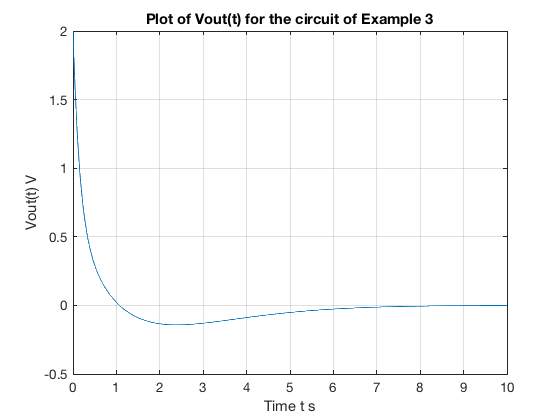

In [30]:
t=0:0.01:10;
Vout = 1.36.*exp(r(1).*t)+0.64.*exp(real(r(2)).*t).*cos(imag(r(2)).*t)-1.84.*exp(real(r(3)).*t).*sin(-imag(r(3)).*t);
plot(t, Vout); grid
title('Plot of Vout(t) for the circuit of Example 3')
ylabel('Vout(t) V'),xlabel('Time t s')

#### Worked Solution: Example 3


File Pencast: [example3.pdf](worked%20examples/example3.pdf) - Download and open in Adobe Accrobat Reader.

The attached "PenCast" works through the solution to Example 3 by hand. It's quite a complex, error-prone (as you will see!) calculation that needs careful attention to detail. This in itself gives justification to my belief that you should use computers wherever possible.

Please note, the PenCast takes around 39 minutes (I said it was a complex calculation) but you can fast forward and replay any part of it.

##### Alternative solution using transfer functions

In [33]:
Vout = tf(2*conv([1, 0],[1, 3]),[1, 8, 10, 4])


Vout =
 
       2 s^2 + 6 s
  ----------------------
  s^3 + 8 s^2 + 10 s + 4
 
Continuous-time transfer function.



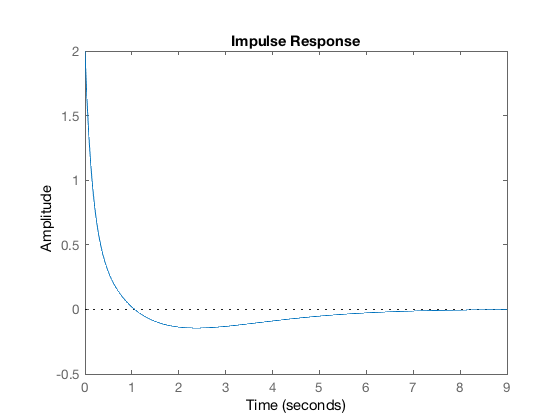

In [34]:
impulse(Vout)

## Complex Impedance Z(s)

Consider the $s$-domain RLC series circuit, wehere the initial conditions are assumed to be zero.

![Complex Impedance $Z(s)$](pictures/impedence.png)

For this circuit, the sum

$$R + sL + \frac{1}{sC}$$ 

represents that total opposition to current flow. Then,

$$I(s) = \frac{V_s(s)}{R + sL + 1/(sC)}$$

and defining the ratio $V_s(s)/I(s)$ as $Z(s)$, we obtain

$$Z(s) = \frac{V_s(s)}{I(s)} = R + sL + \frac{1}{sC}$$

The $s$-domain current $I(s)$ can be found from 

$$I(s) = \frac{V_s(s)}{Z(s)}$$

where

$$Z(s) = R + sL + \frac{1}{sC}.$$

Since $s = \sigma + j\omega$ is a complex number, $Z(s)$ is also complex and is known as the *complex input impedance* of this RLC series circuit.

### Exercise

Use the previous result to give an expression for $V_c(s)$

<pre style="border: 2px solid blue">















</pre>

### Example 4

For the network shown below, all the complex impedence values are given in $\Omega$ (ohms). 

![Circuit for example 4](pictures/example4.png)

Find $Z(s)$ using:
    
1. nodal analysis
2. successive combinations of series and parallel impedances


<pre style="border: 2px solid blue">















</pre>

**Solutions**: Pencasts [ex4_1.pdf](worked%20examples/ex4_1.pdf) and [ex4_1.pdf](worked%20examples/ex4_1.pdf) &ndash; open in Adobe Acrobat.

## Complex Admittance Y(s)

Consider the $s$-domain GLC parallel circuit shown below where the initial conditions are zero.

![Complex admittance $Y(s)$](pictures/admittance.png)

For this circuit

$$GV(s)+ \frac{1}{sL}V(s) + sCV(s) = I_s(s)$$

$$\left(G+ \frac{1}{sL} + sC\right)V(s) = I_s(s)$$

Defining the ratio $I_s(s)/V(s)$ as $Y(s)$ we obtain

$$Y(s)=\frac{I_s(s)}{V(s)} = G+ \frac{1}{sL} + sC = \frac{1}{Z(s)}$$

The $s$-domain voltage $V(s)$ can be found from 

$$V(s) = \frac{I_s(s)}{Y(s)}$$

where

$$Y(s) = G + \frac{1}{sL} + sC.$$

$Y(s)$ is complex and is known as the *complex input admittance* of this GLC parallel circuit.

### Example 5 - Do It Yourself

Compute $Z(s)$ and $Y(s)$ for the circuit shown below. All impedence values are in $\Omega$ (ohms). Verify your answers with MATLAB.

![Circuit for Example 5](pictures/example5.png)

<pre style="border: 2px solid blue">















</pre>

### Answer 5

$$Z(s) = \frac{65s^4 + 490s^3 + 528s^2 + 400s + 128}{s(5s^2 + 30s + 16)}$$

$$Y(s) = \frac{1}{Z(s)} = \frac{s(5s^2 + 30s + 16)}{65s^4 + 490s^3 + 528s^2 + 400s + 128}$$

Matlab verification: [solution5.m](matlab/solution5.m)